# Superstore-dataset Analysis

### Defining the Problem

#### Context:
This is a Dataset that shows what peple buy online, such as books, toys, clothes, and shoes to food, furniture, and different household items.
#### Objectives:
* What it the store's total income?
* How much profit is gained for each product?
* What ship mode was used the most?
* How has the tendency around the years been for the sales?
* People from city/state shop the most?
* What is the utility margin of the store?
* Are products having high discount rate?
* Which product was most bought?
* Which customer is regular/loyal over the years?

The main objective is to predict how will the sales evolve around the years if the supermarket tactics and sales mantain their pace and complement this with the previous information obtained from the questions.

#### Justification

Answering key questions about total income, product profitability, shipping modes, sales tendencies, regional preferences, utility margins, discount rates, top-selling products, and loyal customers provides valuable insights that empower strategic decision-making, driving success by optimizing operations, capitalizing on opportunities, and enhancing competitiveness in the online supermarket industry.

### Data Collection

*US Superstore data. (2019, November 21). Kaggle. https://www.kaggle.com/datasets/juhi1994/superstore*

Uploaded by: Juhi Badiyani 

###### This is a public dataset uploaded to kaggle in excel format, which will be used as a cvs
###### Kaggle is a website wich can be used to find different kinds of open datasets

In [1]:
#All the libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
path = '../data/raw/US Superstore data.csv'

In [3]:
df = pd.read_csv(path)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21/01/2014,23/01/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


### Data Cleaning

In [4]:
#Verify if there are any NaNs (missing values)
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There are no missing values, therefore we wont need to replace them, so we are going to the next step which is preparing the data for the analysis.

### Data Preparation

In [5]:
#Here we separated the dates columns into day, month & year and dropped the dates columns.

df['Order Day'] = df['Order Date'].str.split('/').str[0].astype(int)
df['Order Month'] = df['Order Date'].str.split('/').str[1].astype(int)
df['Order Year'] = df['Order Date'].str.split('/').str[2].astype(int)

df['Ship Day'] = df['Ship Date'].str.split('/').str[0].astype(int)
df['Ship Month'] = df['Ship Date'].str.split('/').str[1].astype(int)
df['Ship Year'] = df['Ship Date'].str.split('/').str[2].astype(int)
df.drop(columns=['Order Date', 'Ship Date'], inplace=True)

df.head(3)


,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Sales,Quantity,Discount,Profit,Order Day,Order Month,Order Year,Ship Day,Ship Month,Ship Year
0,1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,261.96,2,0.0,41.9136,8,11,2016,11,11,2016
1,2,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,731.94,3,0.0,219.5820,8,11,2016,11,11,2016
2,3,CA-2016-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,14.62,2,0.0,6.8714,12,6,2016,16,6,2016


In [6]:
#Now we are going to drop the columns that are unnecesary. like country because they are all in the USA 
# Also Row Id
df.drop(columns=['Country'], inplace=True)
df.drop(columns=['Row ID'], inplace=True)

### Descriptive Analytics

In [7]:
#Central tendency measures for numerical variables
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Order Day,Order Month,Order Year,Ship Day,Ship Month,Ship Year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896,15.468481,7.809686,2015.722233,15.883730,7.743146,2015.737442
std,32063.693350,623.245101,2.225110,0.206452,234.260108,8.748327,3.284654,1.123555,8.802677,3.340476,1.126141
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.000000,1.000000,2014.000000,1.000000,1.000000,2014.000000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,8.000000,5.000000,2015.000000,8.000000,5.000000,2015.000000
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,15.000000,9.000000,2016.000000,16.000000,9.000000,2016.000000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,23.000000,11.000000,2017.000000,24.000000,11.000000,2017.000000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,31.000000,12.000000,2017.000000,31.000000,12.000000,2018.000000


In [8]:
#Central tendency measures for categorical variables
df.describe(include=['object'])

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,915,2001,3203,19,6026,1523,48


In [9]:
#Standar deviation
numeric_columns = df.select_dtypes(include=['number'])
std_deviation = numeric_columns.std()
std_deviation

Postal Code    32063.693350
Sales            623.245101
Quantity           2.225110
Discount           0.206452
Profit           234.260108
Order Day          8.748327
Order Month        3.284654
Order Year         1.123555
Ship Day           8.802677
Ship Month         3.340476
Ship Year          1.126141
dtype: float64

In [10]:
#Range
range_values = numeric_columns.max() - numeric_columns.min()
range_values

Postal Code    98261.000
Sales          22638.036
Quantity          13.000
Discount           0.800
Profit         14999.954
Order Day         30.000
Order Month       11.000
Order Year         3.000
Ship Day          30.000
Ship Month        11.000
Ship Year          4.000
dtype: float64

In [11]:
#Variance
variance = numeric_columns.var()
variance

Postal Code    1.028080e+09
Sales          3.884345e+05
Quantity       4.951113e+00
Discount       4.262242e-02
Profit         5.487780e+04
Order Day      7.653323e+01
Order Month    1.078895e+01
Order Year     1.262376e+00
Ship Day       7.748713e+01
Ship Month     1.115878e+01
Ship Year      1.268193e+00
dtype: float64

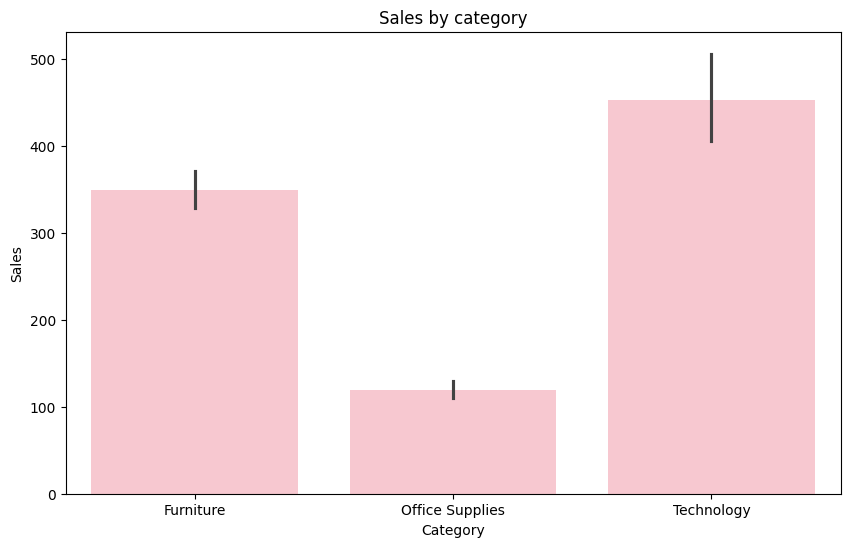

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Category'], y=df['Sales'], color='pink')
plt.title('Sales by category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

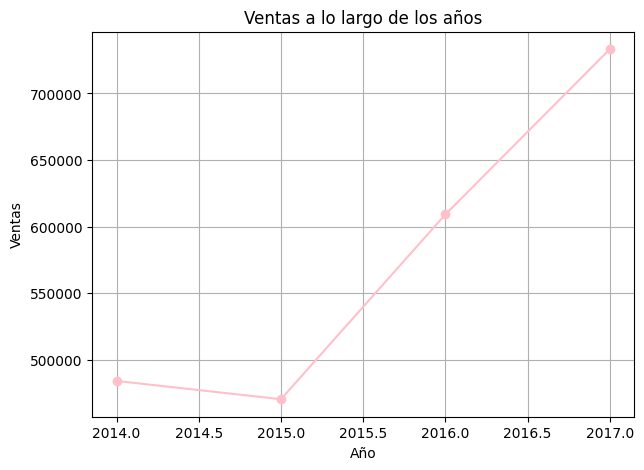

In [55]:
sales_by_year = df.groupby('Order Year')['Sales'].sum()
plt.figure(figsize=(7, 5))
sales_by_year.plot(kind='line', marker='o', color='pink')
plt.title('Ventas a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

In [56]:
sales_by_year

Order Year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64

Tienes que hacer graficas, puntos 5,6 y 7 y todo lo del segundo avance ♥️